## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [210]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns=['medv']).copy()
y = boston[['medv']]

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

**Dados definidos para treinamento da Árvore:**

In [211]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [212]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


**Verificando o formato dos dados para correção, caso necessário:**

In [213]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [214]:
boston.shape

(506, 14)

In [215]:
boston = boston.drop_duplicates()
boston.shape

(506, 14)

In [216]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

**Visualizando a matriz de correlação e suas variáveis:**

In [217]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


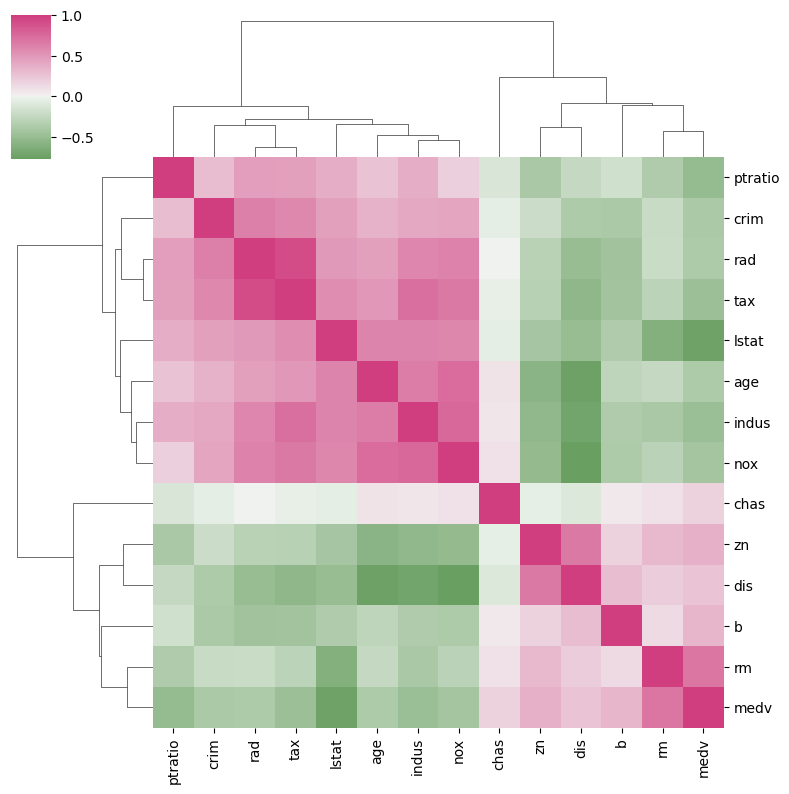

In [218]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 1, center = 'light')

sns.clustermap(boston.corr(), figsize=(8, 8), center = 0, cmap=cmap)

**Construindo a árvore e dividindo a base em treino e teste:**

- Treinando árvores, uma com profundidade máxima = 2, outra com profundidade máxima = 8.

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [220]:
clf_2depth = DecisionTreeRegressor(max_depth=2, random_state=0)
clf_8depth = DecisionTreeRegressor(max_depth=8, random_state=0)

clf_2depth.fit(X_train,y_train)
clf_8depth.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, random_state=0)

**Valor de R² de cada uma das árvores para base de treinamento e de testes:**

In [221]:
#R² de Treino para ambas as profundidades:
r2_treino = clf_2depth.score(X_train, y_train)
r8_treino = clf_8depth.score(X_train, y_train)

#R² de Teste para ambas as profundidades:
r2_teste = clf_2depth.score(X_test, y_test)
r8_teste = clf_8depth.score(X_test, y_test)

#Definição das frases para Treino:
template_treino = "Para o valor de árvore de treino com profundidade = {0} e R² = {1:.2f}"
print(template_treino.format(clf_8depth.get_depth(), r8_treino))
print(template_treino.format(clf_2depth.get_depth(), r2_treino))

#Definição das frases para Teste:
template_teste = "Para o valor de árvore de teste com profundidade = {0} e R² = {1:.2f}"
print(template_teste.format(clf_8depth.get_depth(), r8_teste))
print(template_teste.format(clf_2depth.get_depth(), r2_teste))

Para o valor de árvore de treino com profundidade = 8 e R² = 0.98
Para o valor de árvore de treino com profundidade = 2 e R² = 0.73
Para o valor de árvore de teste com profundidade = 8 e R² = 0.67
Para o valor de árvore de teste com profundidade = 2 e R² = 0.59


**Melhor valor de R² para base de treinamento e de testes:**
- Para Árvore de profundidade = 8, teremos os melhores valores de R².<br><br><br><br>


         
     
 

**Verificação de número de folhas e profundidade ideal por valores de R²**

In [222]:
r_quadrados = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(5, 22):
        regr_1 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_1.fit(X_train, y_train)
        r_quadrado = regr_1.score(X_test, y_test)
        r_quadrados.append(r_quadrado)
        ind_i.append(i)
        ind_j.append(j)
        
df_r = pd.DataFrame({'r_quadrados':r_quadrados, 'profundidade':ind_i, 'n_minimo':ind_j})
df_r.pivot(index='profundidade', columns='n_minimo', values='r_quadrados')

n_minimo,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
profundidade,,,,,,,,,,,,,,,,,
1,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690,0.286690
2,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094,0.592094
3,0.642459,0.642459,0.642459,0.642459,0.645094,0.649635,0.649635,0.652007,0.652007,0.644382,0.644382,0.644382,0.644382,0.645120,0.649049,0.629010,0.629010
4,0.635753,0.646847,0.625745,0.630380,0.633015,0.639404,0.648626,0.650998,0.646058,0.635645,0.635645,0.635645,0.635645,0.637223,0.654857,0.659802,0.660290
5,0.634861,0.652253,0.638108,0.670537,0.652038,0.660783,0.661784,0.663446,0.657566,0.651868,0.651599,0.641187,0.641701,0.641811,0.660621,0.662442,0.660903
6,0.651297,0.673841,0.648109,0.677393,0.626930,0.636600,0.640360,0.644769,0.642397,0.662534,0.662265,0.651854,0.653741,0.653832,0.660621,0.662442,0.660903
7,0.663458,0.669557,0.646274,0.671523,0.626758,0.635968,0.640360,0.644769,0.642397,0.650271,0.652358,0.642120,0.653741,0.653832,0.660621,0.662442,0.660903
8,0.642572,0.673690,0.648051,0.686238,0.626758,0.635968,0.640360,0.644769,0.642397,0.650271,0.652358,0.642120,0.653741,0.653832,0.660621,0.662442,0.660903


<Axes: xlabel='n_minimo', ylabel='profundidade'>

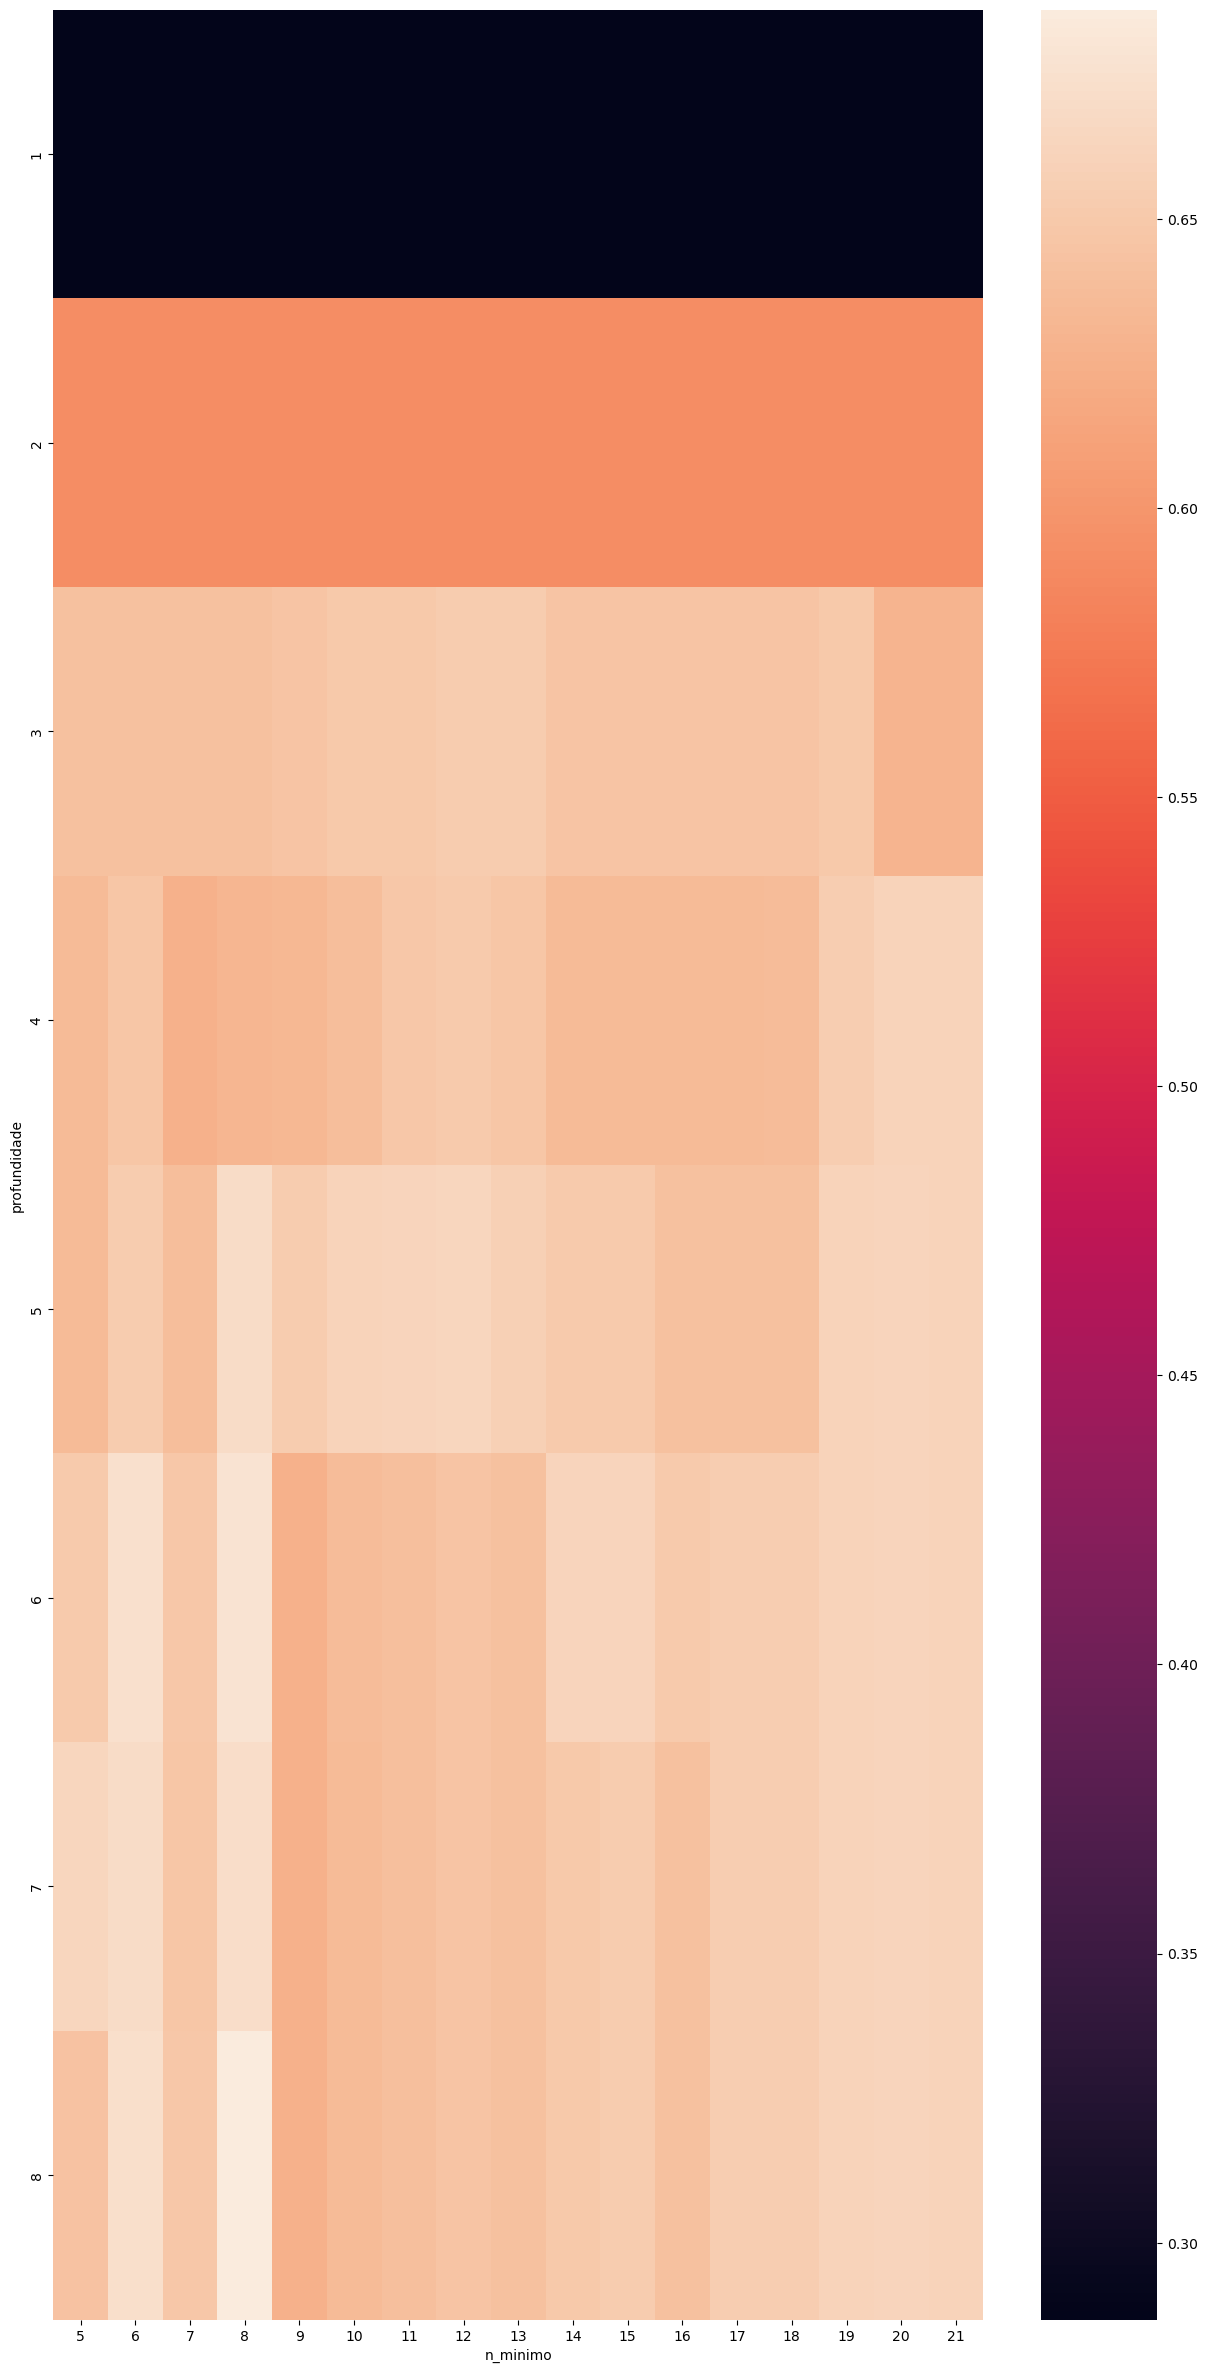

In [223]:
sns.heatmap(df_r.pivot(index='profundidade', columns='n_minimo', values='r_quadrados'))


**Valor de MSE de cada uma das árvores para base de treinamento e de testes:**

In [224]:
# EQM de Treino para ambas as profundidades:
mse2_treino = mean_squared_error(y_train, clf_2depth.predict(X_train))
mse8_treino = mean_squared_error(y_train, clf_8depth.predict(X_train))

# EQM de Teste para ambas as profundidades:
mse2_teste = mean_squared_error(y_test, clf_2depth.predict(X_test))
mse8_teste = mean_squared_error(y_test, clf_8depth.predict(X_test))

#Definição das frases para Treino:
template_treino = "Para o valor de árvore de treino com profundidade = {0} e MSE = {1:.2f}"
print(template_treino.format(clf_8depth.get_depth(), mse8_treino))
print(template_treino.format(clf_2depth.get_depth(), mse2_treino))

#Definição das frases para Teste:
template_teste = "Para o valor de árvore de teste com profundidade = {0} e MSE = {1:.2f}"
print(template_teste.format(clf_8depth.get_depth(), mse8_teste))
print(template_teste.format(clf_2depth.get_depth(), mse2_teste))

Para o valor de árvore de treino com profundidade = 8 e MSE = 1.44
Para o valor de árvore de treino com profundidade = 2 e MSE = 23.18
Para o valor de árvore de teste com profundidade = 8 e MSE = 26.77
Para o valor de árvore de teste com profundidade = 2 e MSE = 33.33


**Melhor valor de MSE para base de treinamento e de testes:**
- Para Árvore de profundidade = 8, teremos os melhores valores de EQM.

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [225]:
path = clf_8depth.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 1.49982636e-16, 1.31926121e-05, 1.31926121e-05,
        1.75901495e-05, 2.11081794e-04, 2.11081794e-04, 4.74934037e-04,
        6.46437995e-04, 8.61917326e-04, 8.61917326e-04, 1.59630607e-03,
        1.86103782e-03, 1.89973615e-03, 1.93931398e-03, 2.22625330e-03,
        3.37730871e-03, 3.70580475e-03, 3.81266491e-03, 3.81266491e-03,
        4.22603342e-03, 4.27440633e-03, 4.45250660e-03, 4.76253298e-03,
        4.76253298e-03, 5.40369393e-03, 5.81794195e-03, 6.38522427e-03,
        6.89533861e-03, 7.14379947e-03, 1.00329815e-02, 1.01813984e-02,
        1.03430079e-02, 1.18733509e-02, 1.35092348e-02, 1.44098505e-02,
        1.57924362e-02, 1.61609499e-02, 1.63632366e-02, 1.71569921e-02,
        1.80593668e-02, 1.98438874e-02, 2.05809461e-02, 2.42357080e-02,
        2.69349164e-02, 3.00989446e-02, 3.01011434e-02, 3.12642292e-02,
        3.14168865e-02, 3.29911250e-02, 3.46934288e-02, 3.56728232e-02,
        3.61213720e-02, 3.84177661e-02, 4.01066403

Text(0, 0.5, 'Impureza total das folhas')

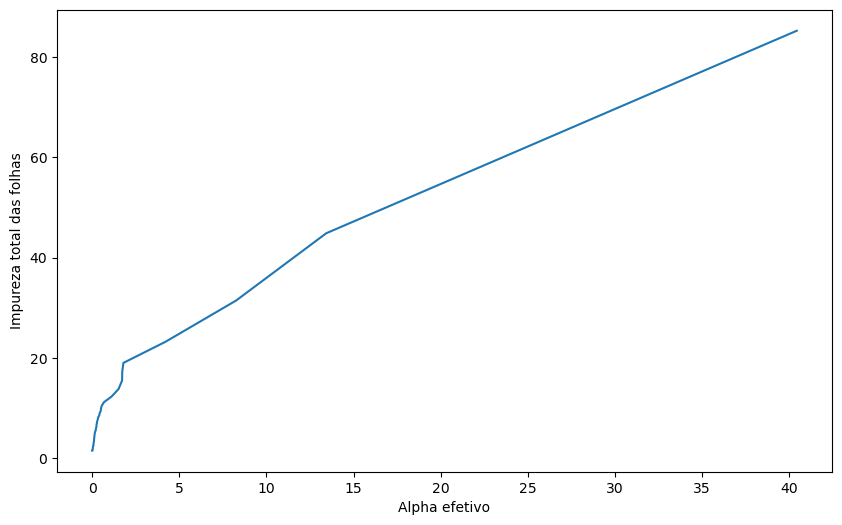

In [226]:
# Impureza da árvore em função do Alpha
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [235]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=62, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

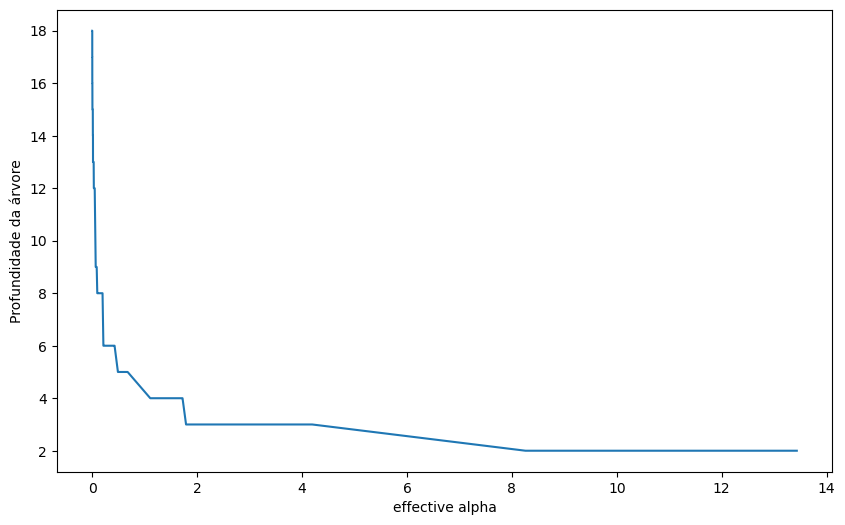

In [236]:
#Profundidade da árvore em função do Alpha
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

Text(0, 0.5, 'MSE')

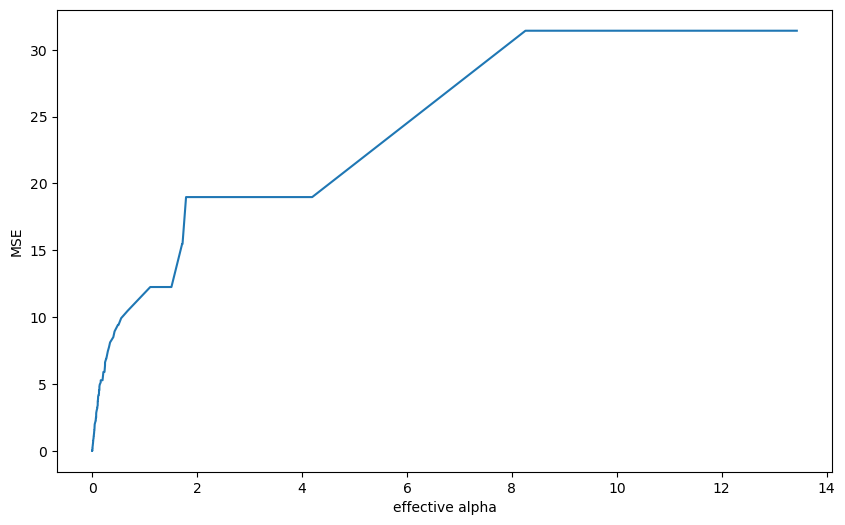

In [240]:
mse = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], mse[:-1])
plt.xlabel("effective alpha")
plt.ylabel("MSE")

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

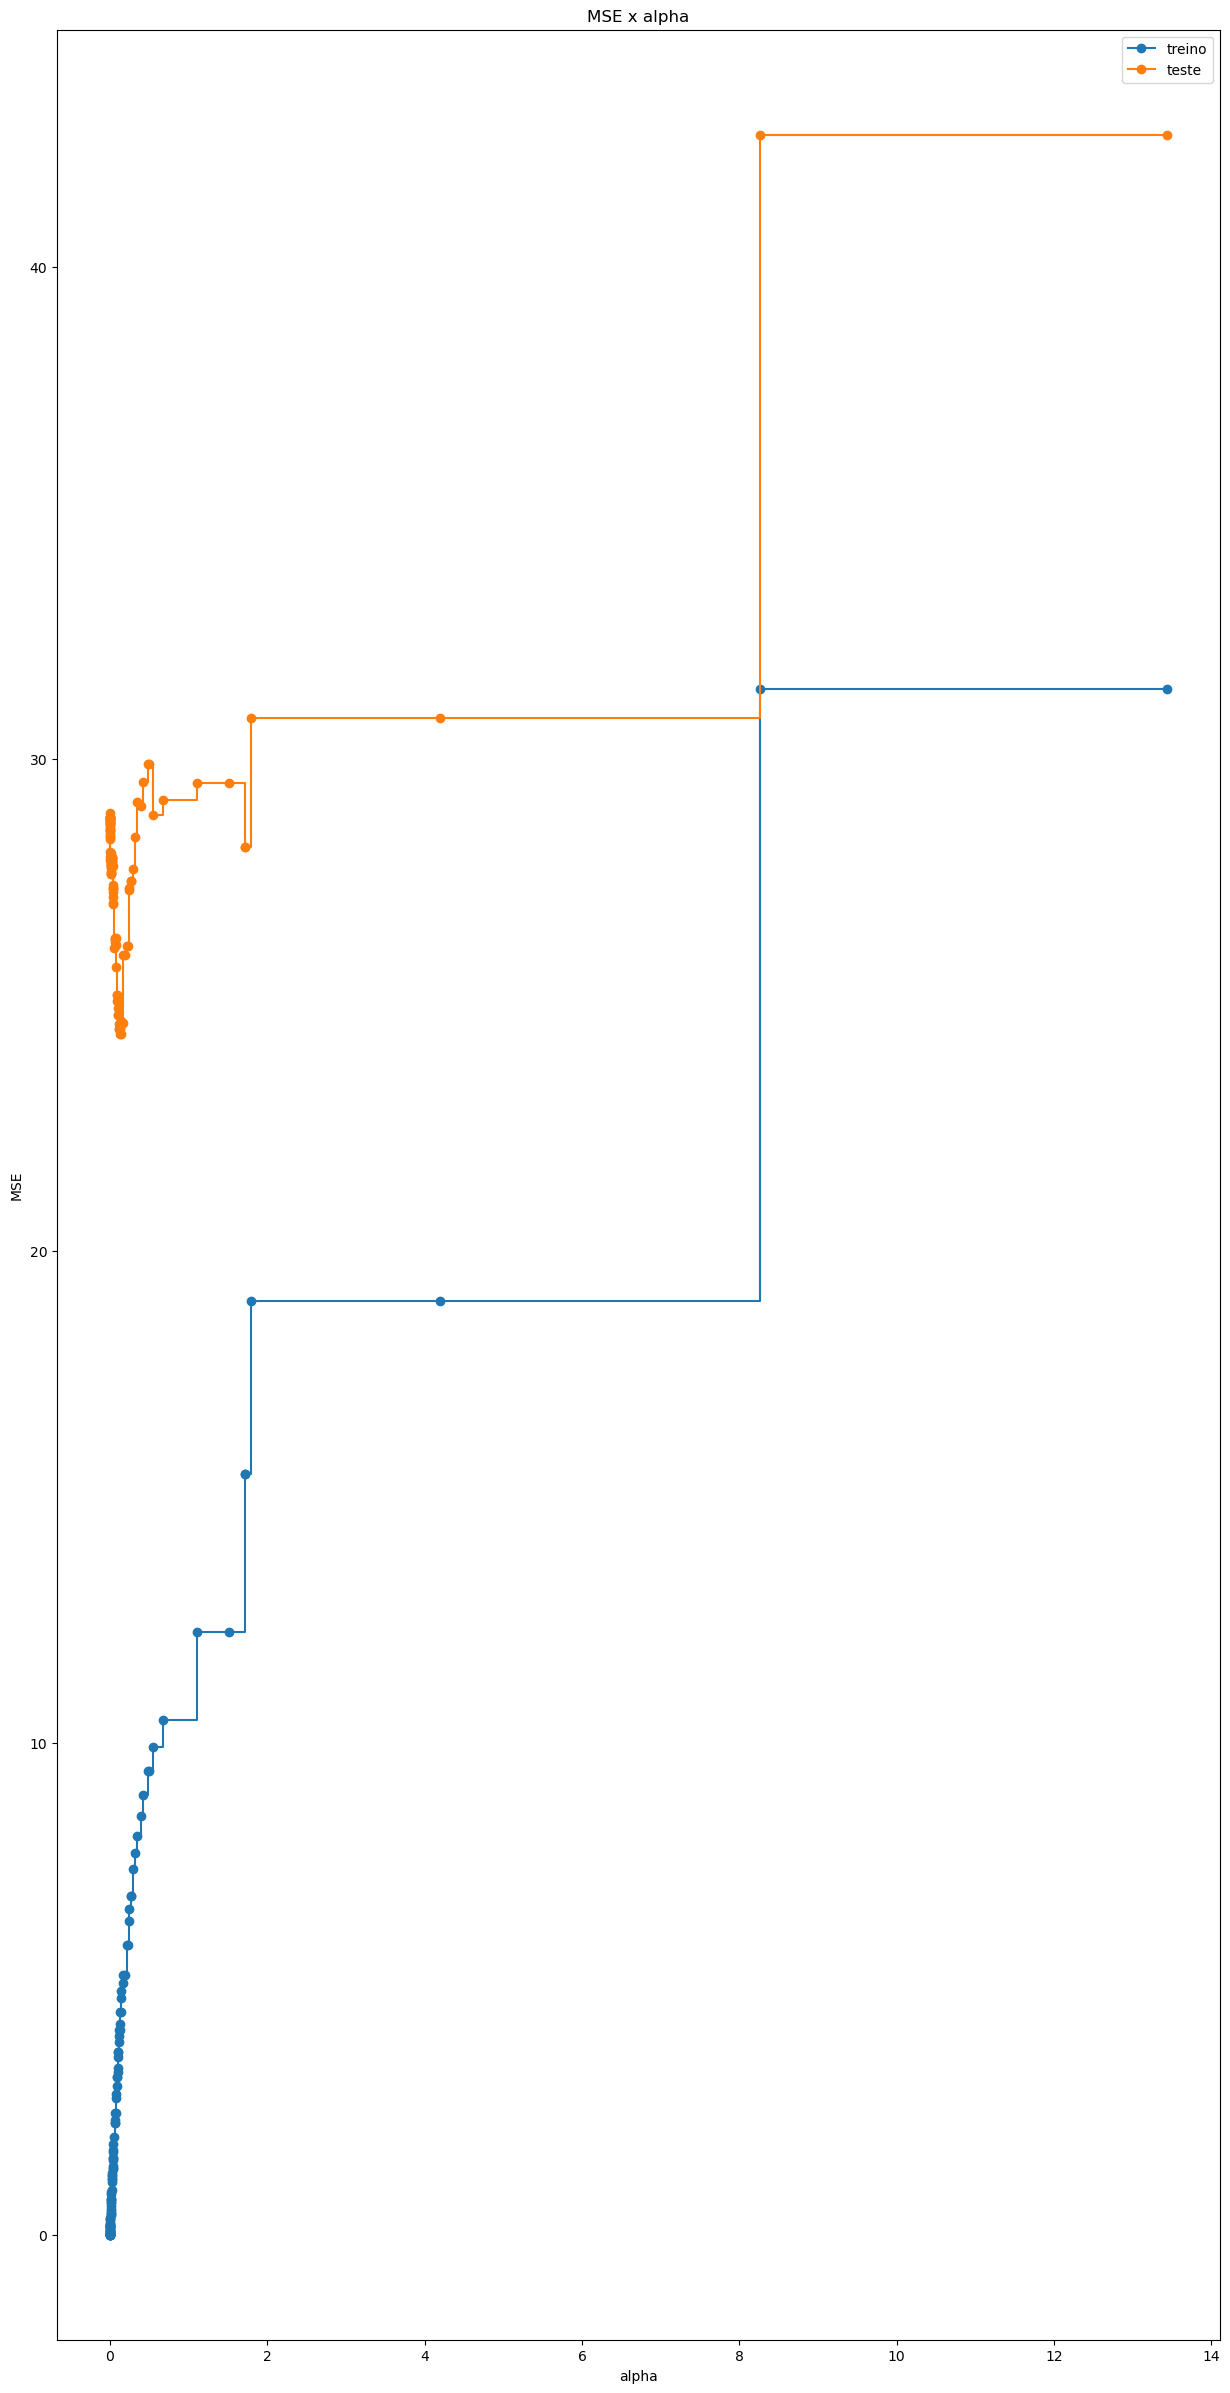

In [238]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [251]:
arvore_final = DecisionTreeRegressor(random_state = 62, ccp_alpha = 8)
arvore_final.fit(X_train, y_train)

print(f"profundidade: {arvore_final.tree_.max_depth}")
print(f"R² na base de testes: {arvore_final.score(X_test, y_test):.2f}")
print(f"MSE na base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test)):.2f}")

profundidade: 2
R² na base de testes: 0.59
MSE na base de testes: 33.33


### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [252]:
arvore_final.score(X_test, y_test)

0.5920940318375818

### 7. Visualize esta árvore.

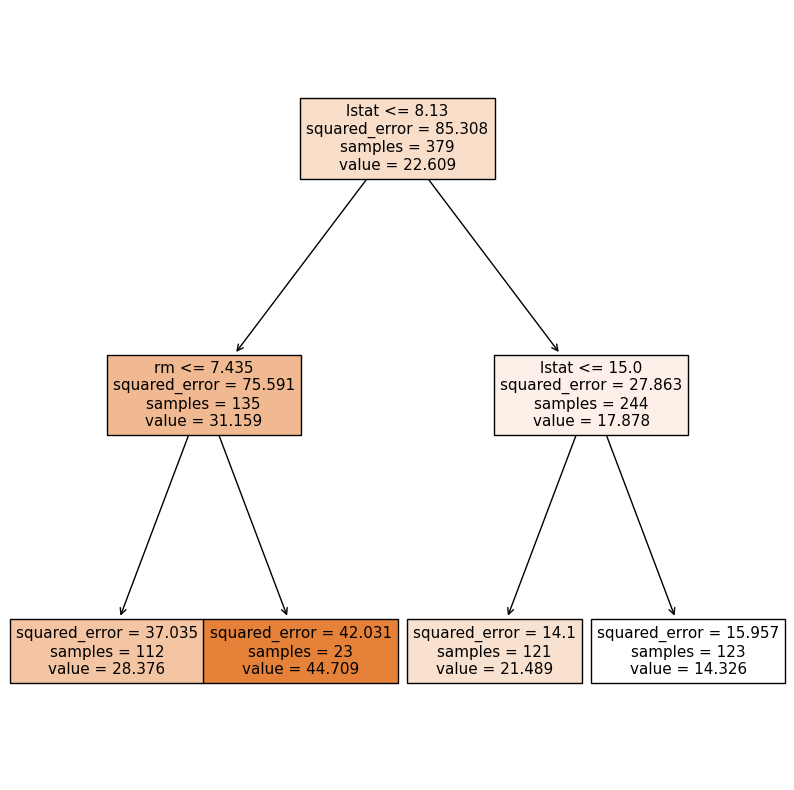

In [253]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(arvore_final, 
                    feature_names=X.columns,  
                    filled=True) 